Two Types of Classification Modeling:

-Topic Modeling using LDA
-Naive Bayes + TF-IDF

# Part 1: Topic Modeling with LDA (Gensim) - Unsupervised Classification

In [1]:
# Topic Modeling using LDA + Gensim
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

,aa,aaargh,aaberg,aacap,aamc,aapc,aaron,aarons,aaronson,aasa,...,ålesund,æon,çakmak,çöpler,égalité,époque,études,ðuro,özal,šamaš
podcast_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Import Gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging for tuning hyperparameters
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
# Need to input the Document-Term Matrix
tdm = data.transpose()
tdm.head()

podcast_id,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaargh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaberg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aacap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aamc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Put the Doc-Term Matrix into gensim format
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [5]:
# Another requirement for gensim - dict of all terms and respective location in the doc-term matrix
cv = pickle.load(open("cv_stop.pkl","rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

# Initial Model - No Parts-of-Speech

In [64]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, passes=100)
lda.print_topics()
# Attempt 1 - 10 passes
#0-Value, Dollars, bitcoin ----- Business & Technology
#1-Mccarthy, war, old ---- History
#2-real estate, business, percent, thousand ----Business & Technology
#3-big, stuff, tell, thought, talk, shit ---- Comedy
#4-Aircraft, commander, company ----History
#5-Police, Family, Murder ---- True Crime
#6-Students, school, college, test ---- Education
#7-Movie, Castle, Batman ---- TV
#8-Talk, Saying, tell, probably ---- TBD
#9-Different, better, percent, person, health ---- Health

# Attempt 2 - 30 passes
#0 - Help, Experience, Sense, Mind ---- Health
#1 - Team, Play, Point, Big ---- Sports
#2 - Aircraft, fantasy, running, madoff ---- Sports
#3 - phone, person, remember, happened, stories ---- Comedy
#4 - eating, weight, foods, diet, body, fat ---- Health
#5 - virus, black, vaccine, police, death ---- News
#6 - bitcoin, trump, better ---- Business & Tech
#7 - Shit, fuck, tell, stuff ---- Comedy
#8 - Mccarthy, movie, police, war, old ---- True Crime?
#9 - fuck, thought, talk, old

[(0,
  '0.004*"jack" + 0.003*"care" + 0.003*"health" + 0.003*"castle" + 0.003*"percent" + 0.003*"dr" + 0.002*"language" + 0.002*"esperanto" + 0.002*"podcast" + 0.002*"stories"'),
 (1,
  '0.007*"team" + 0.005*"williams" + 0.004*"stuff" + 0.004*"games" + 0.004*"point" + 0.004*"somebody" + 0.003*"trade" + 0.003*"hey" + 0.003*"basketball" + 0.003*"lakers"'),
 (2,
  '0.004*"real" + 0.003*"dollars" + 0.003*"started" + 0.003*"better" + 0.003*"help" + 0.003*"start" + 0.003*"thousand" + 0.003*"business" + 0.003*"tell" + 0.003*"estate"'),
 (3,
  '0.011*"police" + 0.006*"murder" + 0.005*"gary" + 0.004*"told" + 0.003*"crime" + 0.003*"hed" + 0.003*"case" + 0.003*"old" + 0.003*"called" + 0.003*"trial"'),
 (4,
  '0.004*"shit" + 0.004*"come" + 0.004*"fuck" + 0.004*"tell" + 0.004*"god" + 0.003*"saying" + 0.003*"talk" + 0.003*"remember" + 0.003*"stuff" + 0.003*"big"'),
 (5,
  '0.006*"war" + 0.005*"aircraft" + 0.005*"came" + 0.004*"hey" + 0.004*"company" + 0.004*"army" + 0.004*"commander" + 0.003*"come" 

In [68]:
# Reading in clean dataset 
data_clean = pd.read_pickle('data_clean.pkl')
#data_clean

In [69]:
# new doc term matrix
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

#Add podcast as a stop word again
add_stop_words = ['like','just','going','know','thats','dont','think','right','im','people','really','time','youre',
                  'want','yeah','got','way','say','theres','did','mean','thing','hes','kind','oh','said','good',
                  'theyre','things','lot','ok','didnt','life','love','make','little','new','actually','feel','year',
                  'look','day','years','guy','doing','guys','ive','yes','great','money','story','shes','work','fucking',
                  'world','man','sort','need','book','game','maybe','house','says','home','went', 'stuff', 'shit', 'whats']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Initialize Doc-Term Matrix
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
#data_dtm

In [70]:
# Export Results to Excel by copying the returned values below
# Evaluate how each podcast was classified
corpus_transformed = lda[corpus]
list(zip(data_dtm.index, [a for a in corpus_transformed]))

[('1', [(8, 0.99932486)]),
 ('2',
  [(2, 0.73367226),
   (3, 0.086848401),
   (4, 0.024305681),
   (6, 0.1434952),
   (8, 0.011335516)]),
 ('3', [(3, 0.14942427), (5, 0.20660079), (8, 0.64348316)]),
 ('4', [(0, 0.025245089), (4, 0.40722147), (6, 0.07303907), (8, 0.48529291)]),
 ('5', [(8, 0.9994809)]),
 ('6',
  [(2, 0.167969),
   (4, 0.014376993),
   (6, 0.15585527),
   (7, 0.27377862),
   (8, 0.38776475)]),
 ('7',
  [(0, 0.087166384),
   (3, 0.22708577),
   (4, 0.28768447),
   (6, 0.11836427),
   (7, 0.022984406),
   (8, 0.25073025)]),
 ('8', [(3, 0.61395508), (6, 0.054022137), (8, 0.33167064)]),
 ('9',
  [(2, 0.085767232),
   (3, 0.42759037),
   (6, 0.051062495),
   (7, 0.2586033),
   (8, 0.17647217)]),
 ('10', [(3, 0.7664519), (4, 0.048964649), (6, 0.02010119), (8, 0.1585784)]),
 ('11',
  [(0, 0.047537066),
   (2, 0.38052884),
   (3, 0.30392337),
   (7, 0.024780208),
   (8, 0.24071367)]),
 ('12', [(3, 0.89008468), (6, 0.067856789), (8, 0.041732848)]),
 ('13', [(4, 0.015450625), (7, 

# Add Parts-of-Speech (Nouns-only)

In [7]:
# Attempt 2: Part-of-Speech (Nouns Only)
# Try to classify with nouns only (parts-of-speech)

from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Takes a word or string, create a 'token' and take only the nouns from text '''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word,pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [8]:
# Reading in clean dataset 
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript,num_id,podcast_category
podcast_id,,,
1,from new york times im michael barbaro this i...,1,News
2,all right and i am back ok yes since youve th...,2,News
3,from a new york times im michael barbaro this...,3,News
4,in college in the i was very into the cultur...,4,News
5,from the new york times im michael barbaro th...,5,News
6,well its almost over i guess yeah just a few ...,6,News
7,hello this is the global news podcast from th...,7,News
8,hello this is the global news podcast from th...,8,News
9,hello this is the global news podcast from th...,9,News


In [9]:
# Use the nouns function from above to transcripts so only nouns remain
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
podcast_id,
1,york times barbaro today infrastructure plan a...
2,yes youve youre name story yeah i things line ...
3,york times barbaro months predawn military mya...
4,college i critic philosopher walter benjamin s...
5,york times barbaro today president biden infra...
6,yeah days butterflies thing stomach butterflie...
7,hello news podcast bbc world service reports a...
8,hello news podcast bbc world service reports a...
9,hello news podcast bbc world service reports a...


In [16]:
# new doc term matrix with only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

#Add the stop words from before
add_stop_words = ['like','just','going','know','thats','dont','think','right','im','people','really','time','youre',
                  'want','yeah','got','way','say','theres','did','mean','thing','hes','kind','oh','said','good',
                  'theyre','things','lot','ok','didnt','life','love','make','little','new','actually','feel','year',
                  'look','day','years','guy','doing','guys','ive','yes','great','money','story','shes','work','fucking',
                  'world','man','sort','need','book','game','maybe','house','says','home','went', 'stuff', 'shit', 'whats']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Initialize Doc-Term Matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aa,aaargh,aaberg,aacap,aamc,aapc,aaron,aarons,aaronson,aasa,...,zynga,àlex,àngel,æon,çakmak,çöpler,égalité,études,özal,šamaš
podcast_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Gensim corpus for nouns DTM
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Gensim vocabulary dict for nouns DTM
id2wordn = dict((v,k) for k, v in cvn.vocabulary_.items())

In [14]:
# Same as before, start with 10 topics, update passes as I go
ldan = models.LdaModel(corpus=corpusn, num_topics=10, id2word=id2wordn, passes=30)
ldan.print_topics()

#Pass with 10 iterations---
#0 - Bowl
#1 - explicit
#2 - Students, Schools, College  ---- Education
#3 - Team, Games, Point, players ---- Sports
#4 - bitcoin, fantasy, quarterback, receiver ----Sports
#5 - Dollars, Business, Trump, Today ---- News
#6 - Health, Women, Care ---- Health
#7 - Idea, bitcoin, sense, power ---- Business & Technology
#8 - Movie, school
#9 - Police, Night, Car, Body ---- True Crime

#Pass with 30 iterations
#0 - Point, Games, Season, Player ---- Sports
#1 - Estate, Dollars, Business, Property, Debt ---- Business & Technology
#2 - Music, Food, Killer, Band, Prison ---- Arts
#3 - Person, Idea, Health, Today, Sense ---- Health
#4 - Stuff, Person, Shit, Night, Today ---- TBD
#5 - Team, night, shit, Today ---- TBD
#6 - Police, Family, History, Trial, Murder, Case ---- True Crime
#7 - Movie, God, Mom, Explicit, Family ---- TBD
#8 - episode, season, school, women ---- TV
#9 - bitcoin, war, vlaue, power, trump, block, soldiers ---- News

[(0,
  '0.009*"team" + 0.005*"aircraft" + 0.005*"point" + 0.005*"games" + 0.005*"season" + 0.004*"stuff" + 0.004*"bit" + 0.004*"night" + 0.003*"number" + 0.003*"player"'),
 (1,
  '0.011*"estate" + 0.010*"dollars" + 0.007*"business" + 0.006*"property" + 0.006*"percent" + 0.006*"today" + 0.005*"properties" + 0.005*"debt" + 0.005*"podcast" + 0.005*"point"'),
 (2,
  '0.009*"bobby" + 0.006*"music" + 0.006*"food" + 0.004*"genocide" + 0.004*"stuff" + 0.004*"parker" + 0.004*"armenia" + 0.003*"killer" + 0.003*"band" + 0.003*"prison"'),
 (3,
  '0.005*"percent" + 0.005*"person" + 0.005*"point" + 0.004*"idea" + 0.004*"health" + 0.004*"stuff" + 0.003*"today" + 0.003*"question" + 0.003*"sense" + 0.003*"number"'),
 (4,
  '0.005*"stuff" + 0.005*"person" + 0.004*"team" + 0.004*"point" + 0.004*"shit" + 0.003*"cody" + 0.003*"week" + 0.003*"night" + 0.003*"bit" + 0.003*"today"'),
 (5,
  '0.007*"team" + 0.005*"night" + 0.005*"stuff" + 0.005*"bit" + 0.005*"week" + 0.005*"lets" + 0.004*"point" + 0.004*"shit"

In [17]:
# Attempt 3: Parts-of-Speech (Nouns+Adj)

def nouns_adj(text):
    '''Takes a string, provides token for text and pulls out only nouns and adj'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [18]:
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
podcast_id,
1,new york times michael barbaro daily today swe...
2,right i ok yes youve youre ok name story yeah ...
3,new york times michael barbaro daily months pr...
4,college i cultural critic philosopher walter b...
5,new york times michael barbaro elite today pre...
6,i guess yeah few more days i butterflies thing...
7,hello global news podcast bbc world service re...
8,hello global news podcast bbc world service re...
9,hello global news podcast bbc world service re...


In [19]:
cvna = CountVectorizer(stop_words=stop_words)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aa,aaargh,aaberg,aacap,aamc,aapc,aaron,aarons,aaronson,aasa,...,zynga,àlex,àngel,æon,çakmak,çöpler,égalité,études,özal,šamaš
podcast_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Gensim corpus for nouns+adj DTM
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Gensim vocabulary dict for nouns DTM
id2wordna = dict((v,k) for k, v in cvna.vocabulary_.items())

In [62]:
# Same as before, start with 10 topics, update passes as I go
ldana = models.LdaModel(corpus=corpusna, num_topics=10, id2word=id2wordna, passes=100)
ldana.print_topics()

#0 - Trump, President, Biden, News, Republican  ---- News
#1 - Mccarthy, War, Aircraft, Army, Company, Commander, American  ---- History
#2 - Bitcoin, Value, Madoff, Cryptocurrency, dollars, digital, financial  ---- Business & Tech
#3 - Team, Games, Big, Point, Week, Season, Player ---- Sports
#4 - Police, Murder, Case, Family, Woman ---- True Crime
#5 - Real Estate, Dollars, Property, Car, Business, Debt, Care ---- Business & Tech
#6 - Fantasy, Team, Free, Wide, Season, Quarterback ---- Sports
#7 - Titanic, states, today, video, united, liberals
#8 - Different, person, idea, sense, important, able, better, social ---- Health
#9 - Big, Movie, Real, School, Different, Best

[(0,
  '0.006*"god" + 0.005*"big" + 0.005*"sure" + 0.004*"fuck" + 0.004*"real" + 0.004*"old" + 0.004*"person" + 0.004*"cool" + 0.004*"school" + 0.004*"night"'),
 (1,
  '0.011*"team" + 0.006*"big" + 0.006*"season" + 0.006*"games" + 0.004*"point" + 0.004*"best" + 0.004*"bit" + 0.004*"week" + 0.004*"player" + 0.004*"players"'),
 (2,
  '0.014*"mccarthy" + 0.005*"joe" + 0.003*"sure" + 0.003*"big" + 0.003*"free" + 0.003*"real" + 0.003*"titanic" + 0.003*"place" + 0.002*"american" + 0.002*"person"'),
 (3,
  '0.007*"real" + 0.005*"different" + 0.005*"business" + 0.005*"dollars" + 0.005*"able" + 0.005*"point" + 0.005*"today" + 0.005*"estate" + 0.004*"better" + 0.004*"person"'),
 (4,
  '0.004*"trump" + 0.004*"point" + 0.004*"different" + 0.004*"big" + 0.004*"president" + 0.004*"country" + 0.003*"america" + 0.003*"black" + 0.003*"percent" + 0.003*"white"'),
 (5,
  '0.009*"jack" + 0.006*"stock" + 0.005*"gamestop" + 0.004*"bligh" + 0.004*"snackers" + 0.004*"mumbler" + 0.004*"video" + 0.003*"robin" +

In [63]:
# Evaluate how each podcast was classified
# Exporting to Excel for making cleaner, prettier tables for summarization
corpus_transformed = ldana[corpusna]
one = list(zip(data_dtmna.index, [a for a in corpus_transformed]))
one

[('1', [(4, 0.3362962), (6, 0.66287518)]),
 ('2',
  [(0, 0.33291528),
   (3, 0.070584513),
   (4, 0.33508033),
   (6, 0.09562853),
   (9, 0.15926024)]),
 ('3', [(4, 0.52888966), (6, 0.16715761), (8, 0.30324578)]),
 ('4', [(0, 0.28928271), (6, 0.69859987), (7, 0.011821351)]),
 ('5', [(4, 0.83909279), (6, 0.15733448)]),
 ('6', [(3, 0.22780818), (4, 0.38112253), (9, 0.39050433)]),
 ('7', [(0, 0.023637179), (4, 0.4528963), (6, 0.5188731)]),
 ('8', [(4, 0.99937963)]),
 ('9', [(4, 0.9720735), (9, 0.027414082)]),
 ('10', [(4, 0.99932623)]),
 ('11', [(4, 0.73989928), (6, 0.16207315), (9, 0.097527385)]),
 ('12', [(4, 0.99941677)]),
 ('13',
  [(0, 0.016890325), (1, 0.072475001), (4, 0.66603464), (6, 0.24439092)]),
 ('14', [(0, 0.13829863), (4, 0.8529709)]),
 ('15', [(4, 0.99976003)]),
 ('16', [(4, 0.83714628), (5, 0.16259773)]),
 ('17', [(4, 0.76083994), (7, 0.23892485)]),
 ('18', [(4, 0.76474905), (6, 0.23495397)]),
 ('19', [(0, 0.17609073), (6, 0.62398481), (7, 0.19876452)]),
 ('20', [(4, 0.51

In [39]:
type(corpus_transformed)

gensim.interfaces.TransformedCorpus

# Part 2: Naive Bayes - Supervised Classification

In [71]:
# Load packages used
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style#

In [73]:
# Reading in clean dataset 
data_clean = pd.read_pickle('data_clean.pkl')

# Don't need the number ID for this
data_clean = data_clean.drop('num_id',axis=1)
data_clean.head()

,transcript,podcast_category
podcast_id,,
1,from new york times im michael barbaro this i...,News
2,all right and i am back ok yes since youve th...,News
3,from a new york times im michael barbaro this...,News
4,in college in the i was very into the cultur...,News
5,from the new york times im michael barbaro th...,News


In [74]:
# Get the text categories
text_categories = data_clean.podcast_category
# Split into Training and Test subsets
from sklearn.model_selection import train_test_split
# define the training set
# And convert to arrays
train, test = train_test_split(data_clean,test_size=0.2, random_state=41)
X_test = test.iloc[:,0].values
y_test = test.iloc[:,1].values
X_train = train.iloc[:,0].values
y_train = train.iloc[:,1].values

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [75]:
# Validate split correctly 80/20 Train/Test
print("We have {} training samples".format(len(X_train)))
print("We have {} test samples".format(len(X_test)))

We have 240 training samples
We have 60 test samples


In [76]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(X_train, y_train)
# Predict the categories of the test data
predicted_categories = model.predict(X_test)

In [77]:
test

,transcript,podcast_category
podcast_id,,
198,mandalorian episode of this is welcome back t...,TV
52,this is the bigger pockets podcast show for ...,Education
127,and hello everybody welcome to episode of sp...,Sports
260,the following is a conversation with ryan sch...,Business & Technology
152,on purpose is so grateful to be sponsored by ...,Health
150,hey we launched a new podcast on the ringer d...,Sports
15,the presenting sponsor of this episode of par...,News
264,the following is a conversation with saagar a...,Business & Technology
88,hey guys im sean hayes here with jason batema...,Comedy


In [78]:
predicted_categories

array(['Comedy', 'Comedy', 'Sports', 'Comedy', 'Comedy', 'Sports',
       'Sports', 'Sports', 'Comedy', 'Comedy', 'Comedy', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Comedy', 'True Crime',
       'Comedy', 'True Crime', 'Comedy', 'True Crime', 'Sports', 'Comedy',
       'Comedy', 'Sports', 'Comedy', 'True Crime', 'Sports', 'Comedy',
       'Comedy', 'Sports', 'Sports', 'Comedy', 'True Crime', 'Sports',
       'Comedy', 'Sports', 'Comedy', 'Sports', 'Comedy', 'Comedy',
       'Comedy', 'Comedy', 'Sports', 'Comedy', 'Sports', 'Comedy',
       'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Sports', 'Sports',
       'Comedy', 'Comedy', 'Comedy', 'Sports', 'Comedy', 'Sports'],
      dtype='<U21')

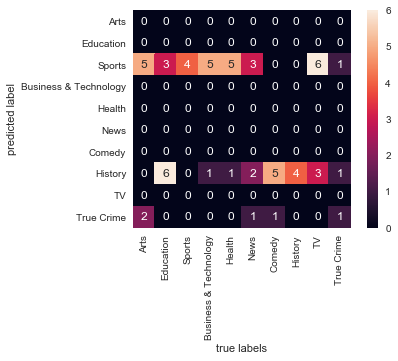

The accuracy is 0.15


In [82]:

# Plot Confusion Matrix
mat = confusion_matrix(y_test, predicted_categories)
mat
lab = ['Arts','Education','Sports','Business & Technology','Health', 'News', 'Comedy', 'History','TV', 'True Crime']
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=lab,yticklabels=lab)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_test, predicted_categories)))